## Download the file to process

In [ ]:
!wget https://s3-geospatial.s3.us-west-2.amazonaws.com/trips.csv

--2024-10-31 16:18:40--  https://s3-geospatial.s3.us-west-2.amazonaws.com/trips.csv
Resolving s3-geospatial.s3.us-west-2.amazonaws.com (s3-geospatial.s3.us-west-2.amazonaws.com)... 52.92.188.50, 52.92.188.162, 3.5.86.158, ...
Connecting to s3-geospatial.s3.us-west-2.amazonaws.com (s3-geospatial.s3.us-west-2.amazonaws.com)|52.92.188.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46137103 (44M) [text/csv]
Saving to: ‘trips.csv’

trips.csv           100%[===================>]  44.00M  31.6MB/s    in 1.4s    

2024-10-31 16:18:42 (31.6 MB/s) - ‘trips.csv’ saved [46137103/46137103]



In [ ]:
!ls -tl

total 45060
drwxr-xr-x 1 root root     4096 Oct 29 13:25 sample_data
-rw-r--r-- 1 root root 46137103 Oct 10 04:41 trips.csv


### First Process with Pandas Dataframe

In [ ]:
import pandas as pd

df = pd.read_csv(
    "trips.csv"
)

<ipython-input-4-bd51fec95097>:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,695,2013-06-01 00:00:01.000,2013-06-01 00:11:36.000,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,NaN,Subscriber,1983.0,1,NaN,NaN,NaN
1,693,2013-06-01 00:00:08.000,2013-06-01 00:11:41.000,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,NaN,Subscriber,1984.0,1,NaN,NaN,NaN
2,2059,2013-06-01 00:00:44.000,2013-06-01 00:35:03.000,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,NaN,Customer,NaN,0,NaN,NaN,NaN
3,123,2013-06-01 00:01:04.000,2013-06-01 00:03:07.000,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,NaN,Subscriber,1960.0,1,NaN,NaN,NaN
4,1521,2013-06-01 00:01:22.000,2013-06-01 00:26:43.000,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,NaN,Subscriber,1983.0,1,NaN,NaN,NaN


In [ ]:
# Convert pickup_datetime to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the hour from pickup_datetime
df['hour'] = df['tpep_pickup_datetime'].dt.hour

In [ ]:
# Group by the hour column and count the number of trips
hourly_demand = df.groupby('hour').size().reset_index(name='trip_count')

# Sort by trip count in descending order to find peak hours
hourly_demand = hourly_demand.sort_values(by='trip_count', ascending=False)

In [ ]:
hourly_demand.head(24)

,hour,trip_count
18,18,20638
17,17,20593
13,13,17390
12,12,17303
8,8,16838
16,16,16341
14,14,16053
19,19,15714
15,15,15057
9,9,13522


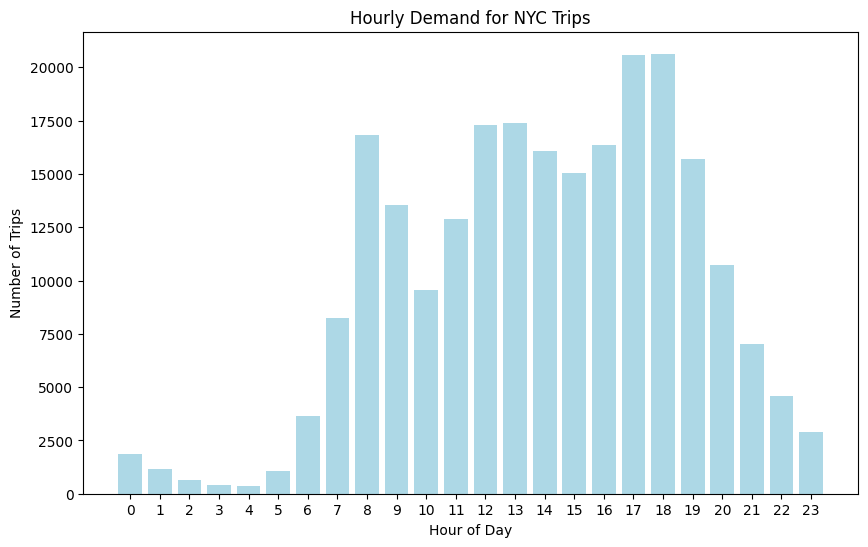

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(hourly_demand['hour'], hourly_demand['trip_count'], color='lightblue')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Demand for NYC Trips")
plt.xticks(range(0, 24))  # Display all 24 hours on the x-axis
plt.show()

In [ ]:
query = """
    SELECT hour, COUNT(*) as trip_count
    FROM df
    GROUP BY hour
    ORDER BY trip_count DESC
"""

In [ ]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=3b1c402ad17fb753183e22969fc1fdf13cbff88b057c2646097cf223fc91dd62
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
import pandasql as psql

result = psql.sqldf(query)

In [ ]:
result.head()

,hour,trip_count
0,18,20638
1,17,20593
2,13,17390
3,12,17303
4,8,16838


In [ ]:
# SQL query to extract hour and count trips by hour
query = """
    SELECT strftime('%H', tpep_pickup_datetime) as hour, COUNT(*) as trip_count
    FROM df
    GROUP BY hour
    ORDER BY trip_count DESC
"""

In [ ]:
result = psql.sqldf(query)

In [ ]:
result.head()

,hour,trip_count
0,18,20638
1,17,20593
2,13,17390
3,12,17303
4,08,16838


## Process the data with Spark

### Install PySpark

In [ ]:
!pip install pyspark==3.5.3

In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkConf

conf = SparkConf()
conf.set("spark.app.name", "PySpark DataFrame #1")
conf.set("spark.master", "local[*]")

spark = SparkSession.builder\
        .config(conf=conf)\
        .getOrCreate()

In [ ]:
df = spark.read.format("csv").option("header", "true").load("trips.csv")

In [ ]:
df.printSchema()

root
 |-- VendorID: string (nullable = true)
 |-- tpep_pickup_datetime: string (nullable = true)
 |-- tpep_dropoff_datetime: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- trip_distance: string (nullable = true)
 |-- pickup_longitude: string (nullable = true)
 |-- pickup_latitude: string (nullable = true)
 |-- RatecodeID: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- dropoff_longitude: string (nullable = true)
 |-- dropoff_latitude: string (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- fare_amount: string (nullable = true)
 |-- extra: string (nullable = true)
 |-- mta_tax: string (nullable = true)
 |-- tip_amount: string (nullable = true)
 |-- tolls_amount: string (nullable = true)
 |-- improvement_surcharge: string (nullable = true)
 |-- total_amount: string (nullable = true)



In [ ]:
df.show()

+--------+--------------------+---------------------+---------------+--------------------+----------------+---------------+----------+--------------------+-----------------+----------------+------------+-----------+----------+-------+----------+------------+---------------------+------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|       trip_distance|pickup_longitude|pickup_latitude|RatecodeID|  store_and_fwd_flag|dropoff_longitude|dropoff_latitude|payment_type|fare_amount|     extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|
+--------+--------------------+---------------------+---------------+--------------------+----------------+---------------+----------+--------------------+-----------------+----------------+------------+-----------+----------+-------+----------+------------+---------------------+------------+
|     695|2013-06-01 00:00:...| 2013-06-01 00:11:...|            444|  Broadway & W 24 St|      40.7423543|   -73.9891

In [ ]:
df.count()

234466

In [ ]:
df.rdd.getNumPartitions()

2

In [ ]:
from pyspark.sql.functions import hour, count

# Extract the hour of departure from the departure time column (e.g., `pickup_datetime`)
df = df.withColumn("hour", hour("tpep_pickup_datetime"))

In [ ]:
# Group by hour and count trips
hourly_demand = df.groupBy("hour").agg(count("*").alias("trip_count"))

# Sort by trip_count to see peak hours
hourly_demand = hourly_demand.orderBy("trip_count", ascending=False)

In [ ]:
hourly_demand.show()

+----+----------+
|hour|trip_count|
+----+----------+
|  18|     20638|
|  17|     20593|
|  13|     17390|
|  12|     17303|
|   8|     16838|
|  16|     16341|
|  14|     16053|
|  19|     15714|
|  15|     15057|
|   9|     13522|
|  11|     12898|
|  20|     10729|
|  10|      9549|
|   7|      8233|
|  21|      7042|
|  22|      4568|
|   6|      3638|
|  23|      2899|
|   0|      1842|
|   1|      1143|
+----+----------+
only showing top 20 rows



In [ ]:
df.createOrReplaceTempView("trips")

In [ ]:
# SQL query to extract hour and count trips by hour
query = """
    SELECT hour(tpep_pickup_datetime) as hour, COUNT(*) as trip_count
    FROM trips
    GROUP BY 1
    ORDER BY trip_count DESC
"""

In [ ]:
results = spark.sql(query)

In [ ]:
results.show()

+----+----------+
|hour|trip_count|
+----+----------+
|  18|     20638|
|  17|     20593|
|  13|     17390|
|  12|     17303|
|   8|     16838|
|  16|     16341|
|  14|     16053|
|  19|     15714|
|  15|     15057|
|   9|     13522|
|  11|     12898|
|  20|     10729|
|  10|      9549|
|   7|      8233|
|  21|      7042|
|  22|      4568|
|   6|      3638|
|  23|      2899|
|   0|      1842|
|   1|      1143|
+----+----------+
only showing top 20 rows



In [ ]:
driver_results = results.collect()
# pyspark.sql.Row는 DataFrame의 레코드에 해당하며 필드별로 이름이 존재#
for r in driver_results:
    print(r)

Row(hour=18, trip_count=20638)
Row(hour=17, trip_count=20593)
Row(hour=13, trip_count=17390)
Row(hour=12, trip_count=17303)
Row(hour=8, trip_count=16838)
Row(hour=16, trip_count=16341)
Row(hour=14, trip_count=16053)
Row(hour=19, trip_count=15714)
Row(hour=15, trip_count=15057)
Row(hour=9, trip_count=13522)
Row(hour=11, trip_count=12898)
Row(hour=20, trip_count=10729)
Row(hour=10, trip_count=9549)
Row(hour=7, trip_count=8233)
Row(hour=21, trip_count=7042)
Row(hour=22, trip_count=4568)
Row(hour=6, trip_count=3638)
Row(hour=23, trip_count=2899)
Row(hour=0, trip_count=1842)
Row(hour=1, trip_count=1143)
Row(hour=5, trip_count=1058)
Row(hour=2, trip_count=627)
Row(hour=3, trip_count=424)
Row(hour=4, trip_count=367)
